<a href="https://colab.research.google.com/github/Alenushka2013/Coursera/blob/master/125587_21_1_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BF%D0%B5%D1%80%D0%B5%D0%B1%D0%BE%D1%80%D0%B0_%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, median_absolute_error

https://www.kaggle.com/datasets/devansodariya/student-performance-data

In [3]:
df = pd.read_csv('/content/student_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [5]:
df['G1'] = df['G1'].astype(int)
df['G2'] = df['G2'].astype(int)
df['G3'] = df['G3'].astype(int)

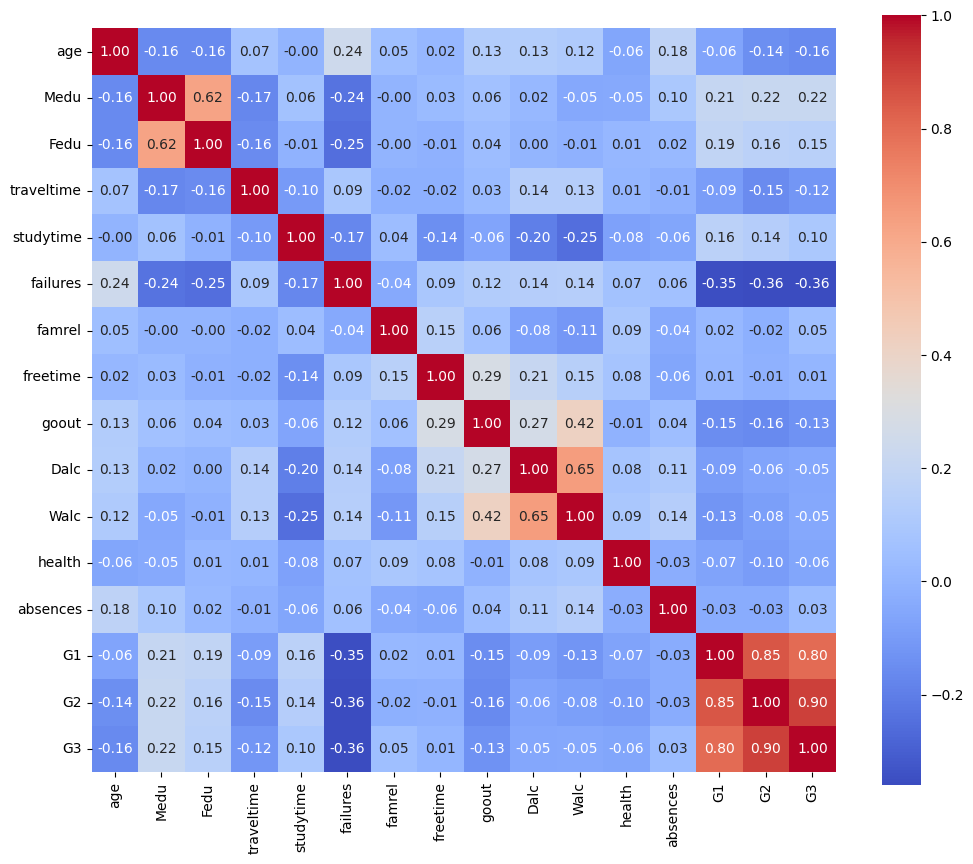

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), fmt='.2f', square=True, annot=True, cmap='coolwarm')
plt.show()

# plt.subplots(figsize=(12, 10))
# sns.heatmap(df.corr(),fmt='.2f', square = True, annot=True)
# plt.show()

## Подготовка данных

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['G1', 'G2', 'G3']), df['G3'], test_size=0.2, random_state=42)

In [9]:
categorical_features = df.drop(columns=['G1', 'G2', 'G3']).select_dtypes(include= object).columns.values
categorical_features

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

In [10]:
numeric_features = df.drop(columns=['G1', 'G2', 'G3']).select_dtypes(exclude= object).columns.values
numeric_features

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences'], dtype=object)

In [12]:
from sklearn.pipeline import make_pipeline # конвейер подготовки данных
from sklearn.pipeline import Pipeline # конвер алгоритмов
from sklearn.impute import SimpleImputer # пропуски заполняются медианными значениями
from sklearn.preprocessing import OneHotEncoder, StandardScaler # onehot encoding и стандартизации
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
# конвейер подготовки данных числового типа
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"),
                                    StandardScaler())

# конвейер подготовки данных
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, numeric_features),
        (
            'cat',
            OneHotEncoder(handle_unknown='ignore', sparse_output=False), #  handle_unknown='ignore'
            categorical_features
        )
    ],
    verbose_feature_names_out = False, # verbose_feature_names_out = False в названии не будет кучи cut
)
# подготовка и обучение алгоритма
alg = Pipeline(steps=[
    ('enc', preprocessor), # подготовка
    ('alg', RandomForestRegressor()) # алгоритм
])

# обучение алгоритма
alg.fit(X_train, y_train)

Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences'], dtype=object)),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object))],
                                   verbose_feature_names_out=False)),
                ('alg', RandomForestRegressor())])

In [13]:
# предсказания
preds = alg.predict(X_test)

# коэффициент детерминации и медианна абсолютная ошибка
r2_score(y_test, preds), median_absolute_error(y_test, preds)

(0.29565319366736487, np.float64(2.4800000000000004))

In [14]:
# среднее и стандартное отклонение целевой переменной
y_test.mean(), y_test.std()

(np.float64(10.772151898734178), 4.557184710920929)

## Grid search

Гиперапараметры решающего леса: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [15]:
parameters = {
    # название этпапа подготовки__гиперпараметр: [сетка (список) параметров]
    'alg__n_estimators': [100, 300, 500, 1000],
    'alg__min_samples_leaf': [1, 2, 4, 6],
    'alg__max_features': ['auto', 'sqrt', 'log2']
}

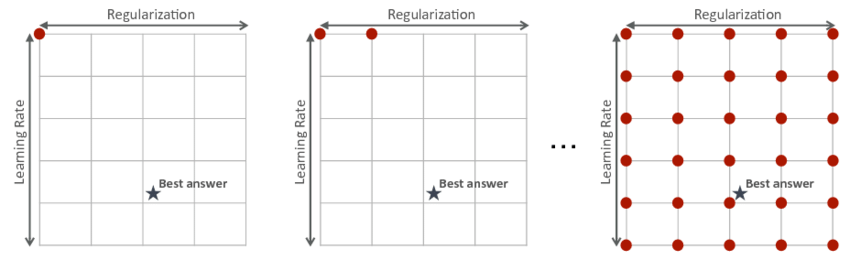

In [ ]:
from sklearn.model_selection import GridSearchCV
# сетка гиперпараметров
gs = GridSearchCV(alg, # выбор алгоритма или пайплайна (подготовка + алгоритм)
                  parameters, # сетка гиперпараметров
                  cv=5, # количество фолдов кросс-валидации
                  verbose=2, # отображать процесс перебора гиперпараметров
                  n_jobs=2) # параллелизм вычислений

gs.fit(X_train, y_train)
gs.best_params_

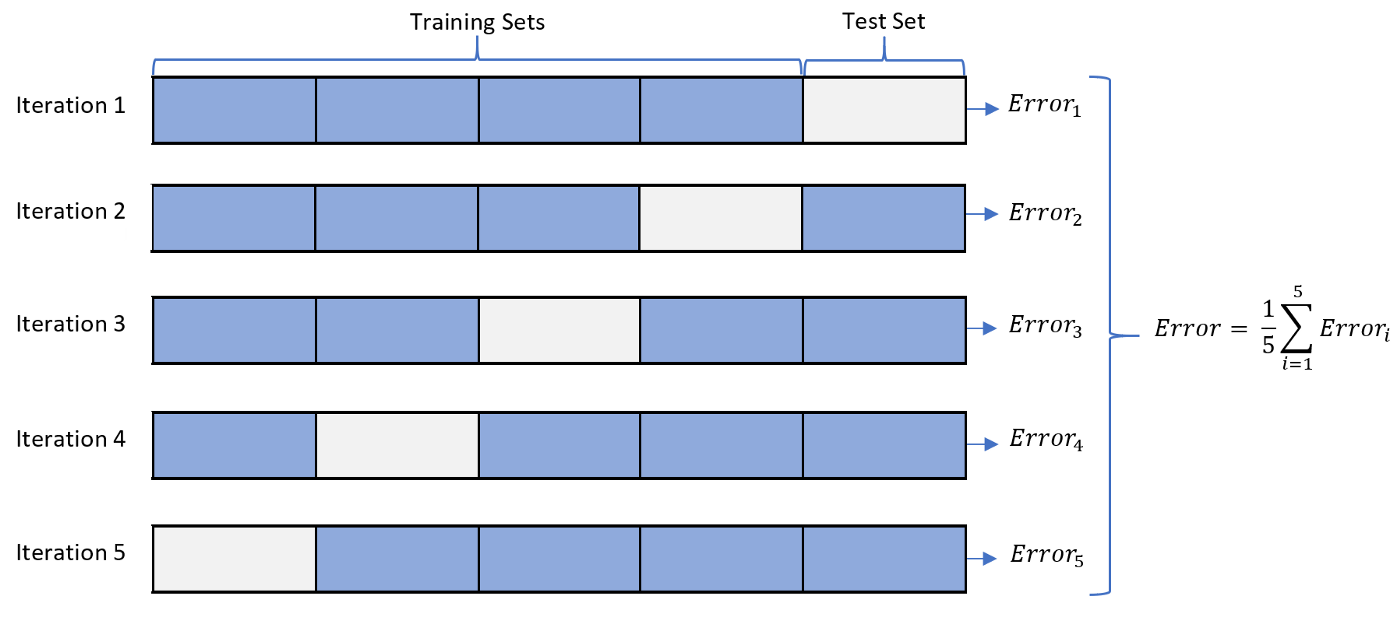

In [ ]:
gs.cv_results_

Модуль кросс-валидации

In [18]:
preds = gs.best_estimator_.predict(X_test)

r2_score(y_test, preds), median_absolute_error(y_test, preds)

(0.20964251098677833, np.float64(2.8100000000000005))